In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_bpine_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Beta-Pinene
0,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.016667
1,9,0.263696,0.018027,-0.040742,-0.177703,0.057154,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0.016667
2,12,0.301049,-0.056156,-0.030174,-0.036708,0.015147,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.016667
3,13,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.016667
4,17,0.291811,-0.052708,-0.061330,-0.034479,-0.010258,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,42965,0.360708,-0.269375,0.169135,0.099257,0.141142,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.003333
29996,42968,0.107417,-0.105614,-0.117669,-0.047306,0.055133,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.003333
29997,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.003333
29998,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.003333


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..Beta-Pinene', 'index'], axis = 1)
y = df_knn[['X..Beta-Pinene']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.01666667],
       [0.01666667],
       [0.01666667],
       ...,
       [0.00333333],
       [0.00333333],
       [0.00333333]])

<AxesSubplot:ylabel='Count'>

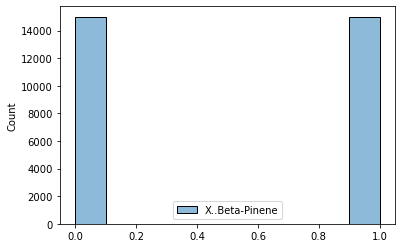

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.03707507132003799

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.027308914689877308

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.16525409129542695

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9309343619679271

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.8891790776302442

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([5.20782404e-02, 4.24801464e-02, 4.88442515e-02, 5.01889287e-02,
       4.78976469e-02, 7.63320478e-07, 5.90336813e-01, 1.21733127e-07,
       7.75753883e-05, 1.60626144e-03, 1.64727871e-03, 7.59319336e-12,
       3.51025411e-03, 8.63394874e-05, 1.79153005e-03, 2.39110973e-03,
       4.89090026e-03, 2.20711070e-03, 7.65574125e-12, 3.60542315e-03,
       1.40268192e-11, 3.21280299e-10, 3.01922972e-03, 2.34300281e-03,
       3.63013410e-03, 3.22330943e-03, 4.21123119e-03, 7.52417196e-05,
       1.10832445e-10, 1.48015453e-03, 3.72224150e-03, 1.36893171e-09,
       3.49904663e-03, 0.00000000e+00, 0.00000000e+00, 2.94461951e-03,
       3.35306688e-03, 3.01827152e-03, 6.49725113e-06, 1.90478228e-03,
       1.31783322e-04, 4.71008598e-03, 1.22675745e-05, 4.35617790e-02,
       3.41230048e-04, 2.96566946e-04, 7.12901405e-04, 1.71703048e-04,
       1.88095433e-03, 1.77498290e-03, 3.91594380e-03, 2.36086578e-03,
       2.44710541e-03, 2.81662503e-04, 4.79417757e-03, 4.87773024e-05,
      

In [19]:
selector.threshold_

0.011627906976744186

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,indica,blueberry
0,0.261225,0.100324,-0.043622,0.141860,-0.034786,0,0
1,0.263696,0.018027,-0.040742,-0.177703,0.057154,0,0
2,0.301049,-0.056156,-0.030174,-0.036708,0.015147,0,0
3,0.276418,-0.133986,0.116293,0.073694,0.041143,0,0
4,0.291811,-0.052708,-0.061330,-0.034479,-0.010258,0,0
...,...,...,...,...,...,...,...
29995,0.360708,-0.269375,0.169135,0.099257,0.141142,1,0
29996,0.107417,-0.105614,-0.117669,-0.047306,0.055133,1,0
29997,0.181714,-0.045560,-0.055692,0.015649,-0.045585,1,0
29998,0.181714,-0.045560,-0.055692,0.015649,-0.045585,1,0


In [24]:
selected_X.columns.to_list()

['lsa_0', 'lsa_1', 'lsa_2', 'lsa_3', 'lsa_4', 'indica', 'blueberry']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_bpine.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_bpine.pkl")

['selector_knn_lsa_elbow_bpine.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.03193377779049654

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.022375123949871352

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.14958316733466823

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.935293919720226

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.9091966646364807

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 7}

kNN (after hyperparameter tuning)

In [38]:
knreg_ht = KNeighborsRegressor(n_neighbors = 7, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [39]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.02982455068917052

In [40]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.1467252501933216

In [41]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.983990733740978

In [42]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.9126332724545068

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [43]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [44]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_bpine.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_bpine.pkl")

['y_test_knreg_lsa_elbow_bpine.pkl']

In [45]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.032749252975157156

In [46]:
mean_squared_error(y_test, y_pred_knreg_test)

0.02442470802406878

In [47]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.15628406196432437

In [48]:
r2_score(y_test, y_pred_knreg_test)

0.9008504961132043

In [49]:
y_test

,X..Beta-Pinene
10747,0.006389
12573,0.007778
29676,0.003333
8856,0.012222
21098,1.000000
...,...
26329,1.000000
29693,0.003333
16605,1.000000
19704,1.000000


In [50]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

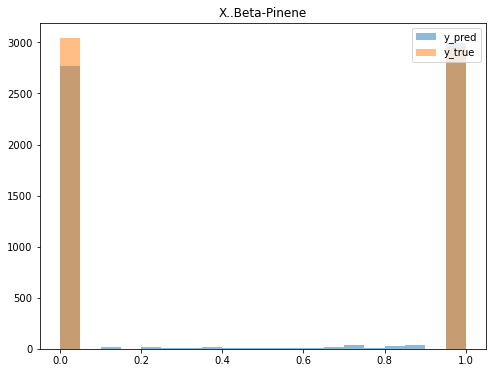

<Figure size 432x288 with 0 Axes>

In [51]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Beta-Pinene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_bpine.png')

Pearson R

In [52]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.951
P-value: 0.000


<AxesSubplot:>

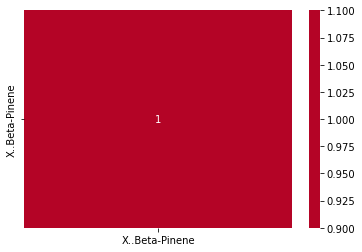

In [53]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)